# DistilBERT Sentiment Classification using Blurr


### Presenter: Manikandan Sivanesan

### **Pitch**

- Building and Sharing the ML apps and models with the community for **anyone** to use.



### **Goal**

- Build a simple sentiment classification model.
- Learn how to share and load the model using HuggingFace Hub
- Learn how to build delightful ML apps without frontend knowledge for anyone to use. 




### **Background Information and Technologies**

- [Text Classification](https://docs.fast.ai/tutorial.text.html) using fastai to train fast and accurate neural networks leveraging pytorch.
- High Level API for Text Classificaton using [blurr library](https://ohmeow.github.io/blurr/text-examples-high-level-api.html#Multiclassification-(one-input)) that integrates fastai & [transformers](https://huggingface.co/docs/transformers/tasks/sequence_classification) with few lines of code.
- [HuggingFace Hub](https://huggingface.co/docs/hub/index#whats-the-hugging-face-hub) to discover and share models. 
- [Gradio](https://gradio.app/getting_started) to build apps showcasing the model capability for the use case.
- [Google Colab](colab.research.google.com) to train using GPU.



## Setup

In [ ]:
%%capture
%pip install ohmeow-blurr -qqq
%pip install gradio==3.0.19
%pip install huggingface_hub["fastai"] -qqq

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# Load IMDB Dataset 

In [ ]:
import torch
import transformers
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

path = untar_data(URLs.IMDB_SAMPLE)
model_path = Path('models')
imdb_df = pd.read_csv(path / 'texts.csv')

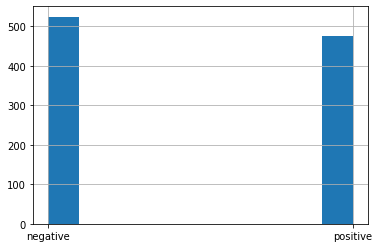

In [ ]:
imdb_df.label.hist()

# Train a Sequence Classification model using [DistilBERT](https://paperswithcode.com/method/distillbert)

In [ ]:
learn = BlearnerForSequenceClassification.from_data(imdb_df, 'distilbert-base-uncased', dl_kwargs=dict(bs=4))

In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,f1_score,accuracy,time
0,0.673687,0.632425,0.684015,0.575000,00:19


epoch,train_loss,valid_loss,f1_score,accuracy,time
0,0.356306,0.336171,0.872093,0.890000,00:32


# Sharing model to Community using HuggingFace Hub

In [ ]:
from huggingface_hub import push_to_hub_fastai
# repo_id = "msivanes/blurr_IMDB_distilbert_cls"
# push_to_hub_fastai(learn, repo_id) # already pushed to the model

# Loading model from HF Hub

In [ ]:
from huggingface_hub import from_pretrained_fastai

repo_id = "msivanes/blurr_IMDB_distilbert_cls"
learn = from_pretrained_fastai(repo_id)
sentences = ['This hack day is amazing', 'I hate the weather today.']

probs = learn.predict(sentences)

print(probs)
print(f"Sentiment Prediction Confidence for the sentence '{sentences[0]}' as positive is {100 * probs[0]['probs'][1]:.2f}%")
print(f"Sentiment Prediction Confidence for the sentence '{sentences[1]}' as positive is {100 * probs[1]['probs'][1]:.2f}%")

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/768 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

[{'label': 'p', 'score': 0.9874382615089417, 'class_index': 1, 'class_labels': ['negative', 'positive'], 'probs': [0.01256176084280014, 0.9874382615089417]}, {'label': 'n', 'score': 0.926864743232727, 'class_index': 0, 'class_labels': ['negative', 'positive'], 'probs': [0.926864743232727, 0.07313523441553116]}]
Sentiment Prediction Confidence for the sentence 'This hack day is amazing' as positive is 98.74%
Sentiment Prediction Confidence for the sentence 'I hate the weather today.' as positive is 7.31%


In [ ]:
learn.predict('Loved how Ryan started talking in gibberish language')

[{'class_index': 1,
  'class_labels': ['negative', 'positive'],
  'label': 'p',
  'probs': [0.029072701930999756, 0.9709272980690002],
  'score': 0.9709272980690002}]

# Gradio Demo

In [ ]:
# %pip install gradio==3.0.19

In [ ]:
import gradio as gr

In [ ]:
import gradio as gr

from huggingface_hub import from_pretrained_fastai
from blurr.text.modeling.all import *

def predict(text): 
  repo_id = "msivanes/blurr_IMDB_distilbert_cls"
  learn = from_pretrained_fastai(repo_id)
  probs = learn.predict(text)
  return f"Sentiment Prediction Confidence for the sentence '{text}' as positive is {100 * probs[0]['probs'][1]:.2f}%"

examples = ['This hack day is amazing', 'I hate the weather today.', 'Loved how Ryan started talking in gibberish language']

demo = gr.Interface(fn=predict, inputs=gr.Textbox(lines=3, label="Input Text"), outputs="text", title='DistiBERT Sentiment Classification', examples=examples)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://37528.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7fa6c3e42310>,
 'http://127.0.0.1:7860/',
 'https://37528.gradio.app')


# **What's next**

- Share models with the community
- Build Gradio ML apps using existing models for internal customers to use and interact with model predictions.